# Enhanced S&P 500 Stock Analysis Notebook

This enhanced version includes:
- Cleaner structure and comments
- Reusable functions
- Technical indicators
- Simple backtesting example
- Risk and return metrics


# Quantitative Analysis of Price and Daily returns
# - By Laxman Kilaru

### 1. Setting up environment

In [1]:
!pip install pandas_datareader
!pip install yfinance
!pip install scipy
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
import seaborn as sb
sb.set()

You should consider upgrading via the 'C:\Users\laxma\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15619 sha256=8520cf113a890dcf795b101eb38a91493ef63acbe14eafb736ec3413b27f07c0
  Stored in directory: c:\users\laxma\appdata\local\pip\cache\wheels\e9\25\85\25d2e1cfc0ece64b930b16972f7e4cc3599c43b531f1eba06d
  Created wheel for peewee: filename=peewee-3.18.3-py3-none-any.whl size=139181 sha256=310a44d8c914fdee11fb1b66760803aaac6512bf37031feeb54c834bd99254fe
  Stored in directory: c:\users\laxma\appdata\local\pip\cache\wheels\3d\96\39\80c50cbf6bd446cdca9dac7d78a1a0d3a1f313859500529f8d
Successfully built multitasking peewee


You should consider upgrading via the 'C:\Users\laxma\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\laxma\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'seaborn'

### 2.Download stock price data, store in dataframe

In [ ]:
snp500 = yf.download('^GSPC','2016-01-01','2024-01-01')


[*********************100%%**********************]  1 of 1 completed


### 3.Take a look at data

In [ ]:
snp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000
...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000


### 4. Storing instantaneous rate of return in separate series

In [ ]:
snp500_close = snp500['Close']
snp500_return = round(np.log(snp500_close).diff()*100,2);
snp500_return.head()

Date
2016-01-04     NaN
2016-01-05    0.20
2016-01-06   -1.32
2016-01-07   -2.40
2016-01-08   -1.09
Name: Close, dtype: float64

### 5. Plot the Series

<Axes: xlabel='Date'>

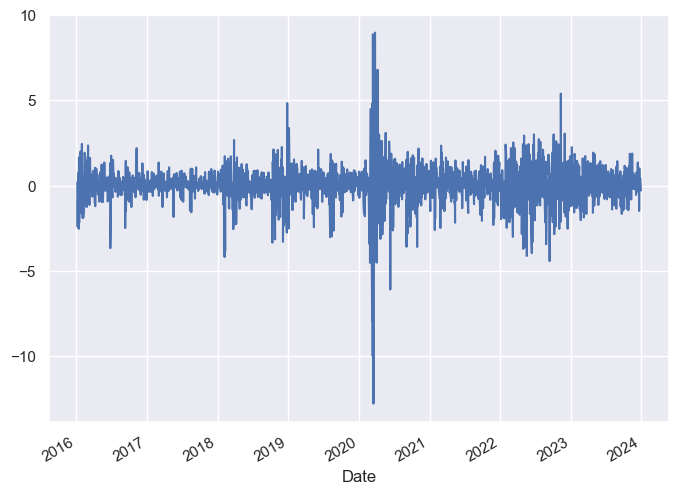

In [ ]:
snp500_return.plot()

<Axes: xlabel='Date'>

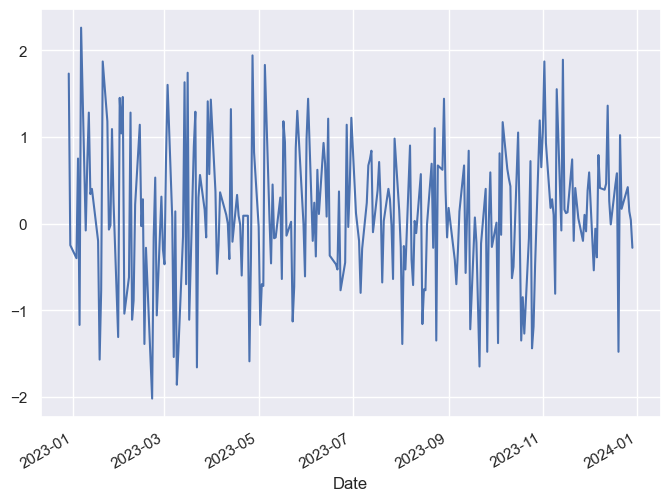

In [ ]:
snp500_return[-252:].plot()

### 6. Pandas describe function for descrptive analysis

In [ ]:
snp500_return.dropna(inplace=True)
snp500_return.describe()

count    2011.000000
mean        0.042909
std         1.178215
min       -12.770000
25%        -0.380000
50%         0.070000
75%         0.580000
max         8.970000
Name: Close, dtype: float64

### 7.An alternative decription using scipy

In [ ]:
from scipy import stats

In [ ]:
n,minmax,mean,var,skew,kurt = stats.describe(snp500_return)
mini,maxi = minmax
std = var**.5

### 8.Histogram Visualisation

In [ ]:
from scipy.stats import norm

(array([1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 8.000e+00,
        3.100e+01, 1.460e+02, 1.061e+03, 6.790e+02, 6.900e+01, 5.000e+00,
        5.000e+00, 1.000e+00, 2.000e+00]),
 array([-12.77      , -11.32066667,  -9.87133333,  -8.422     ,
         -6.97266667,  -5.52333333,  -4.074     ,  -2.62466667,
         -1.17533333,   0.274     ,   1.72333333,   3.17266667,
          4.622     ,   6.07133333,   7.52066667,   8.97      ]),
 <BarContainer object of 15 artists>)

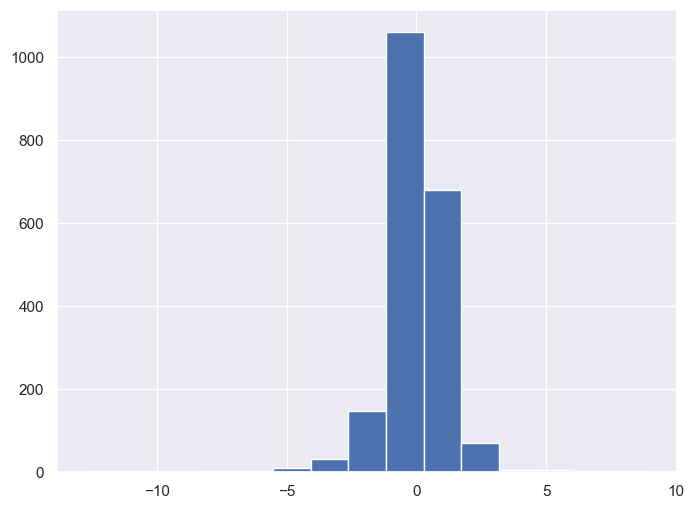

In [ ]:
plt.hist(snp500_return, bins=15)

In [ ]:
from scipy.stats import norm
x=norm.rvs(mean,std,n)

##### Note: The probability density above is defined in the “standardized” form. To shift and/or scale the distribution use the loc and scale parameters. Specifically, norm.pdf(x, loc, scale) is identically equivalent to norm.pdf(y) / scale with y = (x - loc) / scale. 

(array([  3.,   5.,  37.,  62., 156., 252., 303., 378., 371., 217., 131.,
         67.,  20.,   3.,   6.]),
 array([-4.03385902, -3.49293795, -2.95201687, -2.41109579, -1.87017471,
        -1.32925363, -0.78833256, -0.24741148,  0.2935096 ,  0.83443068,
         1.37535176,  1.91627284,  2.45719391,  2.99811499,  3.53903607,
         4.07995715]),
 <BarContainer object of 15 artists>)

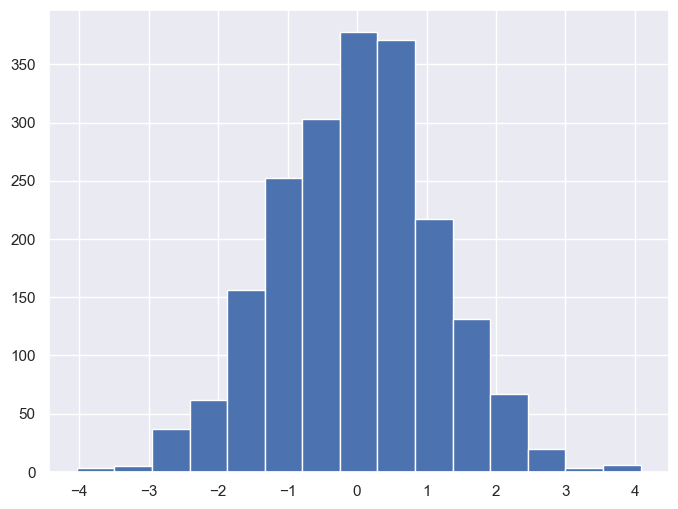

In [ ]:
plt.hist(x,bins=15)

### Is price normally distributed?

#### 9. Using scipy stats to test the kurtosis and the null hypothesis is that the sample is drawn from the population where the underlying kurtosis is that of a normally distributed value

In [ ]:
x_test = stats.kurtosistest(x)
snp500_test = stats.kurtosistest(snp500_return)
print(f'{"         Test Statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-" * 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"SNP500:{snp500_test[0]:12.2f}{snp500_test[1]:16.4f}")

         Test Statistic        p-value
     ------------------------------
x:             0.46          0.6427
SNP500:       21.49          0.0000


#### 10. Plotting histogram of price changes with normal curve overlay

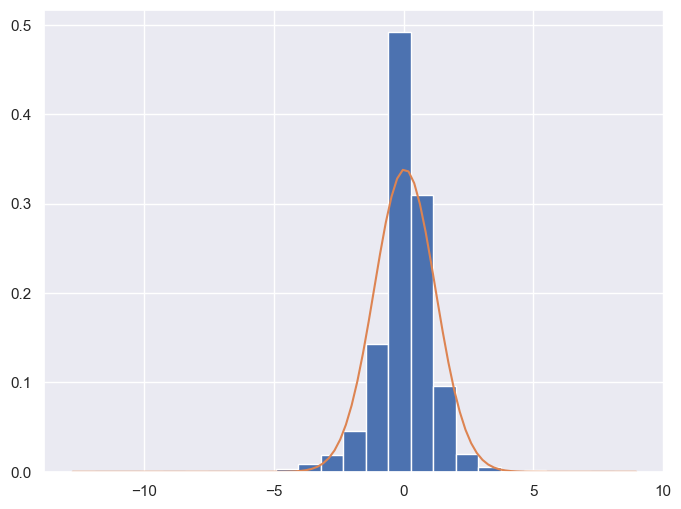

In [ ]:
plt.hist(snp500_return , bins=25,edgecolor='w',density="True")
overlay = np.linspace(mini,maxi,100)
plt.plot(overlay,norm.pdf(overlay,mean,std))

#### Is daily price change significantly different from zero?

#### 11. Conduct Simple hypothesis Test

In [ ]:
stats.ttest_1samp(snp500_return.sample(252),0,alternative='two-sided')

TtestResult(statistic=-0.3033119306526669, pvalue=0.7619034055867676, df=251)

#### Can price movement be described as a random walk

#### 12. Create Price tags

In [ ]:
snp500_close = pd.DataFrame(snp500_close,columns=['Close'])
snp500_close['lag_1'] = snp500_close.Close.shift(1)
snp500_close['lag_2'] = snp500_close.Close.shift(2)
snp500_close.dropna(inplace=True)
snp500_close.head()

,Close,lag_1,lag_2
Date,,,
2016-01-06,1990.260010,2016.709961,2012.660034
2016-01-07,1943.089966,1990.260010,2016.709961
2016-01-08,1922.030029,1943.089966,1990.260010
2016-01-11,1923.670044,1922.030029,1943.089966
2016-01-12,1938.680054,1923.670044,1922.030029


#### 13. Fit Linear Model

In [ ]:
lr = np.linalg.lstsq(snp500_close[['lag_1','lag_2']],snp500_close['Close'],rcond=None)[0]

In [ ]:
snp500_close['predict']=np.dot(snp500_close[['lag_1','lag_2']],lr)
snp500_close.head()

,Close,lag_1,lag_2,predict
Date,,,,
2016-01-06,1990.260010,2016.709961,2012.660034,2017.093573
2016-01-07,1943.089966,1990.260010,2016.709961,1993.744654
2016-01-08,1922.030029,1943.089966,1990.260010,1948.669759
2016-01-11,1923.670044,1922.030029,1943.089966,1924.937848
2016-01-12,1938.680054,1923.670044,1922.030029,1924.262748


<Axes: xlabel='Date'>

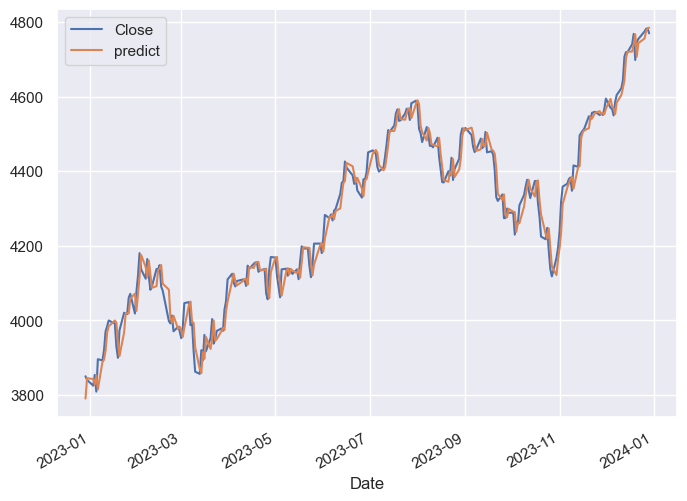

In [ ]:
snp500_close.iloc[-252:][['Close','predict']].plot()

## Data Download and Utilities

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

def get_data(ticker="^GSPC", start="2010-01-01", end=None):
    data = yf.download(ticker, start=start, end=end)
    data.dropna(inplace=True)
    return data

data = get_data()
data.head()

## Technical Indicators

In [ ]:
def add_indicators(df):
    df = df.copy()
    df["SMA_50"] = df["Close"].rolling(window=50).mean()
    df["SMA_200"] = df["Close"].rolling(window=200).mean()
    df["Returns"] = df["Close"].pct_change()
    return df

data = add_indicators(data)
data.tail()

## Simple Moving Average Crossover Strategy Backtest

In [ ]:
def simple_sma_strategy(df):
    df = df.copy()
    df["Signal"] = 0
    df.loc[df["SMA_50"] > df["SMA_200"], "Signal"] = 1
    df["Strategy_Returns"] = df["Signal"].shift(1) * df["Returns"]
    cumulative_strategy = (1 + df["Strategy_Returns"]).cumprod()
    cumulative_buy_hold = (1 + df["Returns"]).cumprod()
    return cumulative_strategy, cumulative_buy_hold, df

strategy_curve, buy_hold_curve, df_bt = simple_sma_strategy(data)

strategy_curve.tail()

## Risk and Performance Metrics

In [ ]:
def performance_metrics(returns, freq=252):
    avg_return = returns.mean() * freq
    volatility = returns.std() * np.sqrt(freq)
    sharpe = avg_return / volatility if volatility != 0 else np.nan
    return avg_return, volatility, sharpe

avg_ret, vol, sharpe = performance_metrics(df_bt["Strategy_Returns"].dropna())
avg_ret, vol, sharpe

## Plot Equity Curves

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(strategy_curve, label="Strategy")
plt.plot(buy_hold_curve, label="Buy & Hold")
plt.legend()
plt.title("Strategy vs Buy & Hold Equity Curve")
plt.xlabel("Date")
plt.ylabel("Equity Curve")
plt.show()